In [85]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

# Region
region = ['France', 'France']
# region = ['Germany', None]
# region = ['Brazil', None]
# region = ['China', 'Hubei']

In [86]:
# Types of data
types = ['Confirmed', 'Deaths', 'Recovered']

# Paths
paths = {t: './COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-{}.csv'.format(t) for t in types}

# Data
data = {t: pd.read_csv(paths[t], index_col=['Country/Region','Province/State']).drop(['Lat', 'Long'], axis=1) for t in types}

# Region
select_data = {t: data[t].loc[region[0], region[1]] for t in types}

# New cases
p = 3 # for filtering
new_cases = {t: select_data[t].diff(periods=p)/p for t in types}

# New cases increase, see https://www.youtube.com/watch?v=Kas0tIxDvrg
new_cases_increase = {t: new_cases[t].diff(periods=p)/p for t in types}

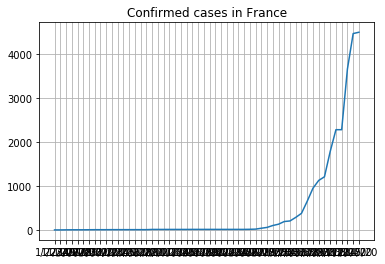

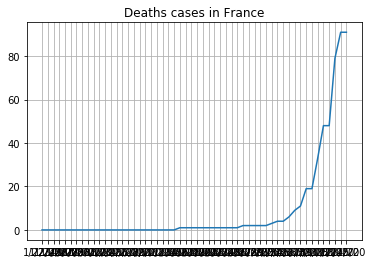

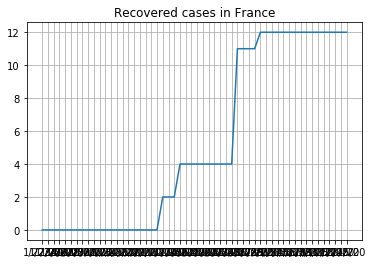

In [87]:
for t in types:
    plt.figure()
    plt.plot(select_data[t])
    plt.grid()
    plt.title('{} cases in {}'.format(t, region[0]))

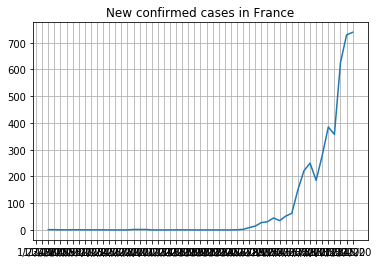

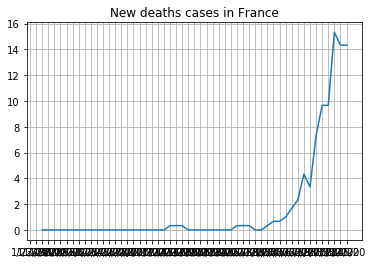

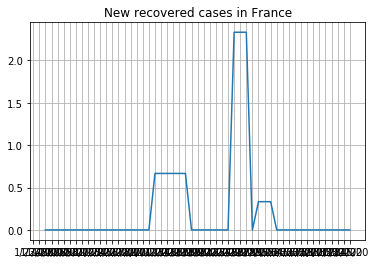

In [88]:
for t in types:
    plt.figure()
    plt.plot(new_cases[t])
    plt.grid()
    plt.title('New {} cases in {}'.format(t.lower(), region[0]))

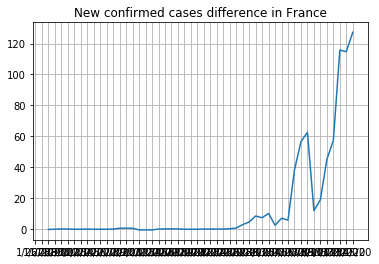

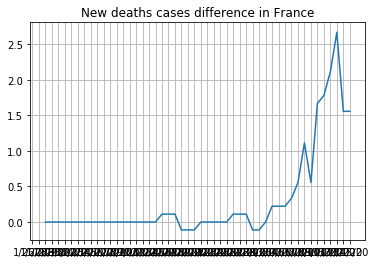

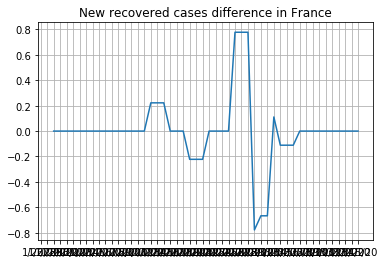

In [89]:
for t in types:
    plt.figure()
    plt.plot(new_cases_increase[t])
    plt.grid()
    plt.title('New {} cases difference in {}'.format(t.lower(), region[0]))